Preprocessing

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [80]:
# import dataset
df = pd.read_csv('diabetes_health.csv', delimiter=',')
df.dataframeName = 'diabetes_health.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 47276 rows and 23 columns


In [81]:
# valeur manquant
print(f'Colonnes avec valeurs manquantes : { df.isnull().sum()} .')

Colonnes avec valeurs manquantes : Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 .


In [82]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
0          111866             2       1       1.0          1  32.0     1.0   
1          206199             0       0       1.0          1  28.0     0.0   
2          144211             0       0       1.0          1  24.0     1.0   
3           89872             2       1       1.0          1  38.0     0.0   
4           34953             0       0       1.0          1  30.0     0.0   
...           ...           ...     ...       ...        ...   ...     ...   
47271        6035             0       0       0.0          1  27.0     1.0   
47272       29918             2       1       0.0          1  26.0     0.0   
47273      159673             0       1       0.0          0  32.0     1.0   
47274       64322             0       1       1.0          1  30.0     0.0   
47275      130631             0       0       0.0          1  29.0     0.0   

       Stroke  HeartDiseaseor

In [83]:
df= df.drop("Unnamed: 0", axis=1)

In [84]:
# les instances dupliquer
lignes_dupliquees = df.duplicated()
print(df[lignes_dupliquees])

#supprision donnees duplique 
nombre_lignes_dupliquees = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nombre_lignes_dupliquees}")

df = df.drop_duplicates()

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1942              0       0       0.0          1  20.0     0.0     0.0   
3160              0       0       0.0          1  31.0     0.0     0.0   
3454              0       0       0.0          1  26.0     0.0     0.0   
3849              0       0       0.0          1  27.0     0.0     0.0   
4536              0       0       0.0          1  27.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
47105             0       0       0.0          1  22.0     0.0     0.0   
47124             0       0       0.0          1  31.0     0.0     0.0   
47216             0       0       0.0          1  27.0     0.0     0.0   
47228             0       0       1.0          1  29.0     0.0     0.0   
47250             0       1       0.0          1  26.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1942                    0.0           

In [85]:
lignes_dupliquees = df.duplicated()
print(df[lignes_dupliquees])


Empty DataFrame
Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]


In [86]:
print(f'Les valeurs que prend la cible sont {df["Diabetes_012"].unique()} ')
diabetes_target = df["Diabetes_012"]

Les valeurs que prend la cible sont [2 0 1] 


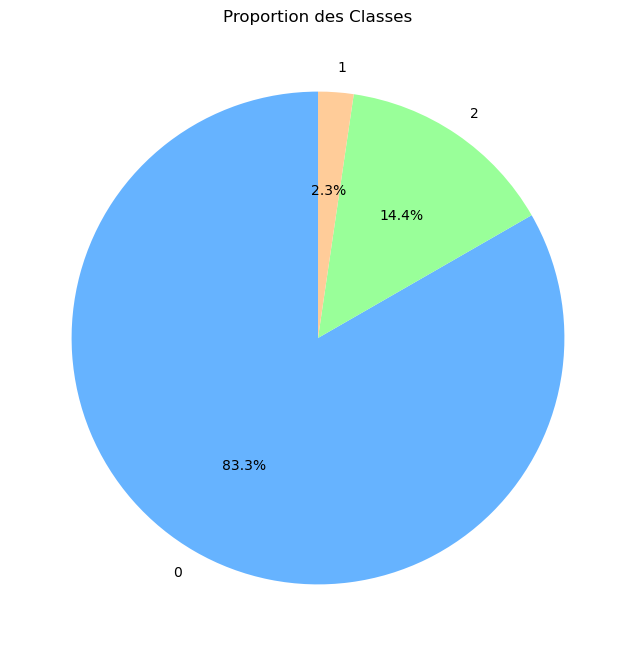

In [87]:
counts = diabetes_target.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proportion des Classes')
plt.show()

on remarque que la dataset est desequilibre 

In [88]:
colonnes_catégorielles = df.select_dtypes(include=['object']).columns

#print("Colonnes catégorielles :")
print(colonnes_catégorielles)

Index([], dtype='object')


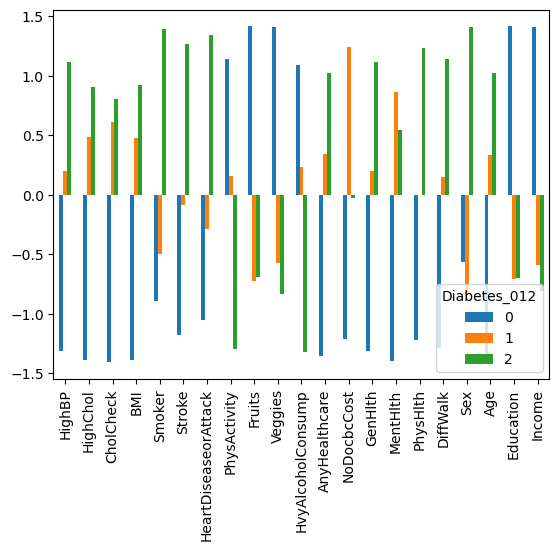

In [89]:
from scipy.stats import zscore

df_grouped = df.groupby(["Diabetes_012"]).mean().apply(lambda col: zscore(col))

df_grouped.T.plot.bar()
plt.show()

df_0 = df[df["Diabetes_012"] == 0]
df_1 = df[df["Diabetes_012"] == 1]
df_2 = df[df["Diabetes_012"] == 2]

X_0 = df_0.drop("Diabetes_012", axis=1)
X_1 = df_1.drop("Diabetes_012", axis=1)
X_2 = df_2.drop("Diabetes_012", axis=1)

X_0_normalized = X_0.apply(lambda col: zscore(col))
X_1_normalized = X_1.apply(lambda col: zscore(col))
X_2_normalized = X_2.apply(lambda col: zscore(col))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


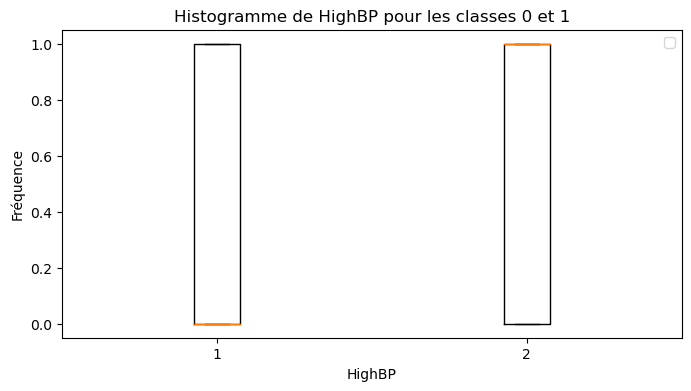

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


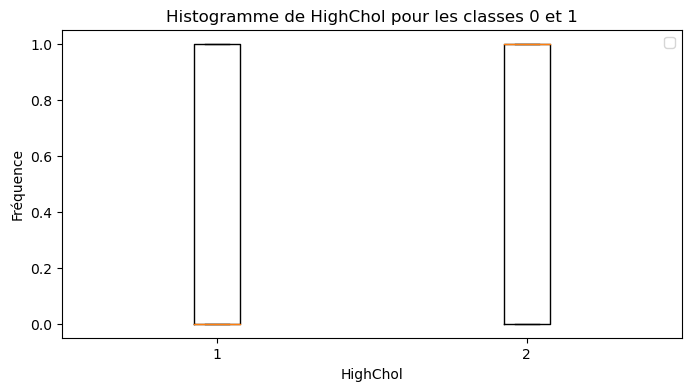

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


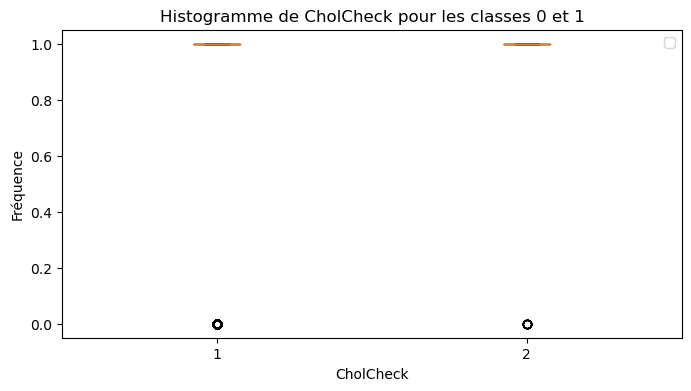

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


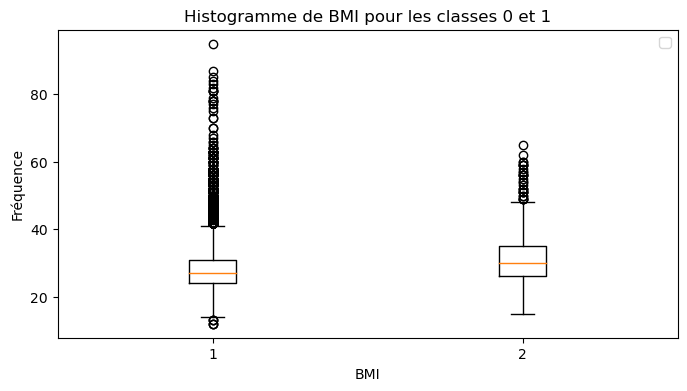

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


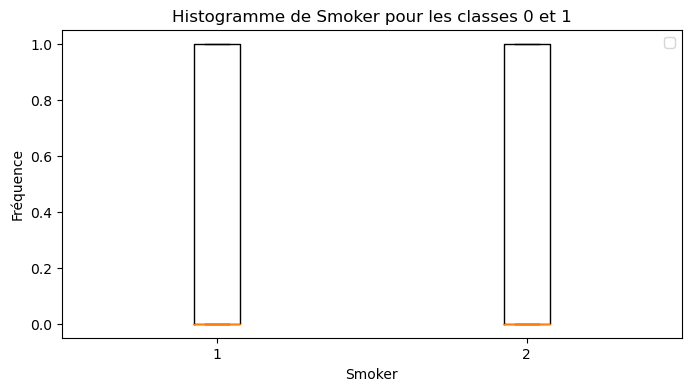

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


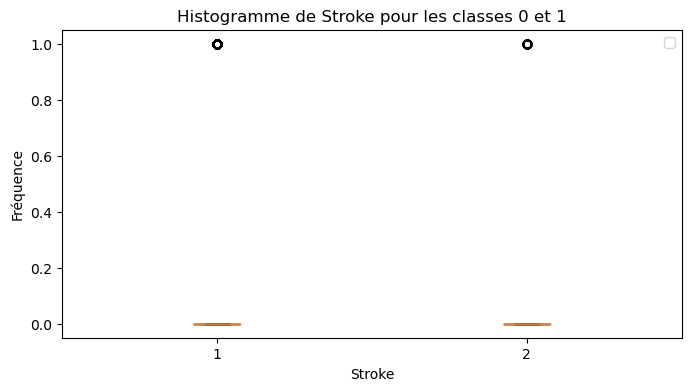

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


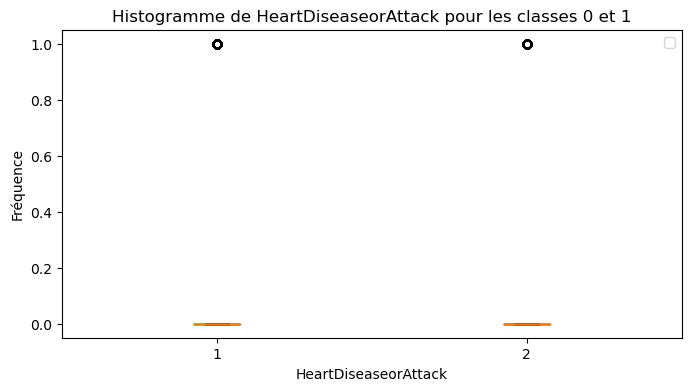

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


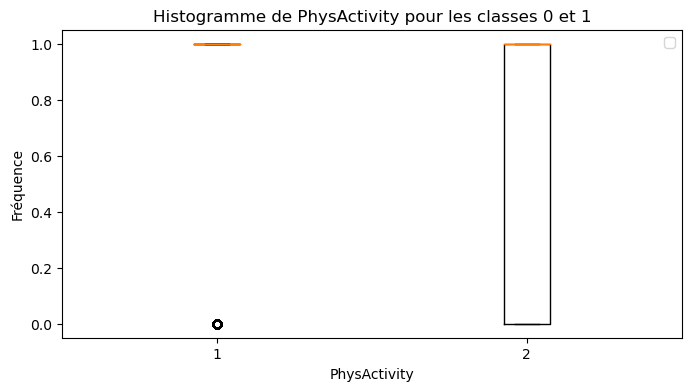

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


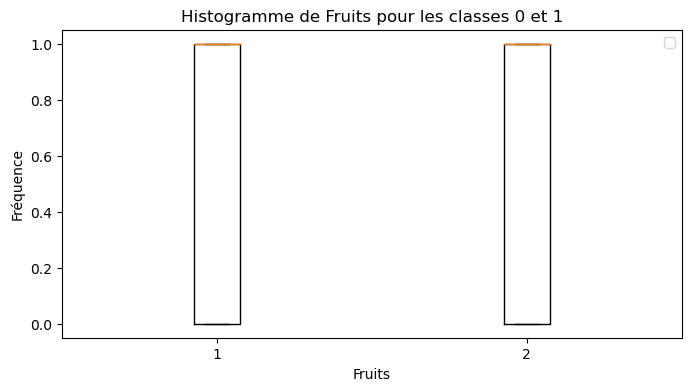

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


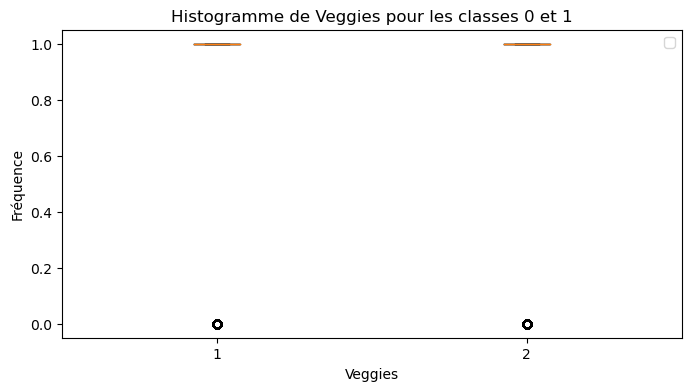

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


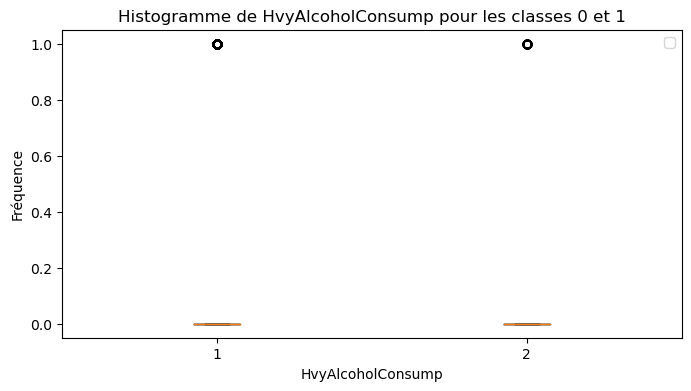

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


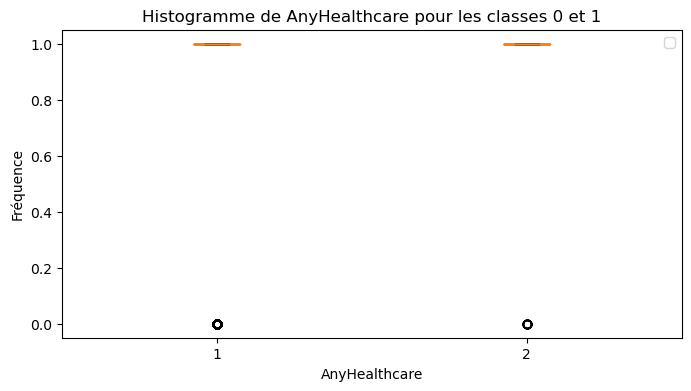

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


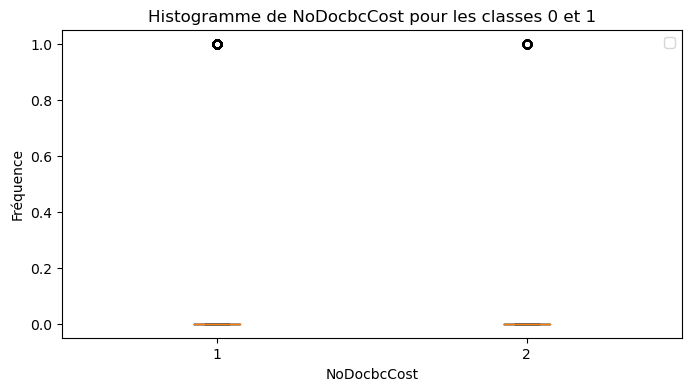

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


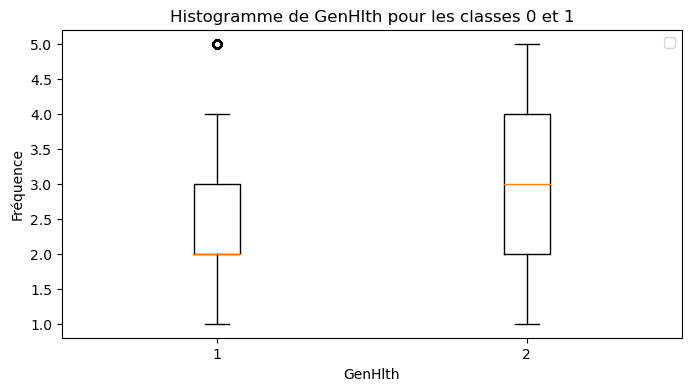

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


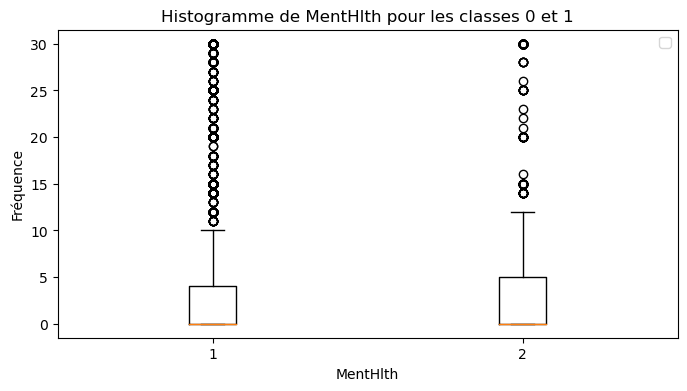

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


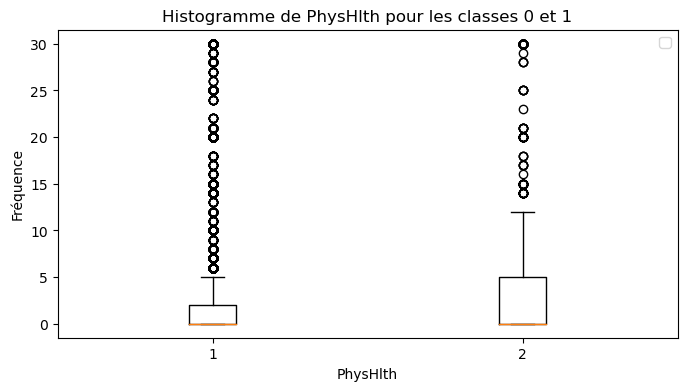

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


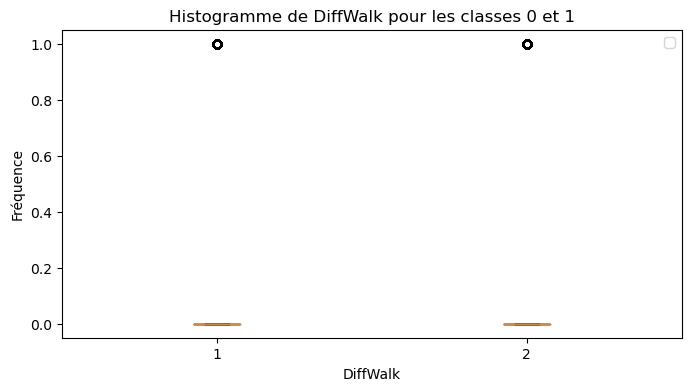

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


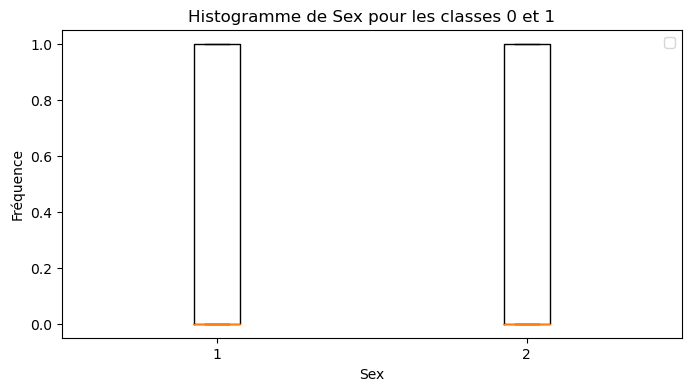

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


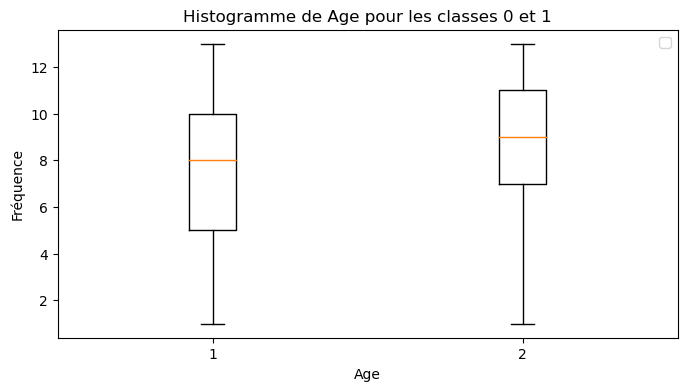

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


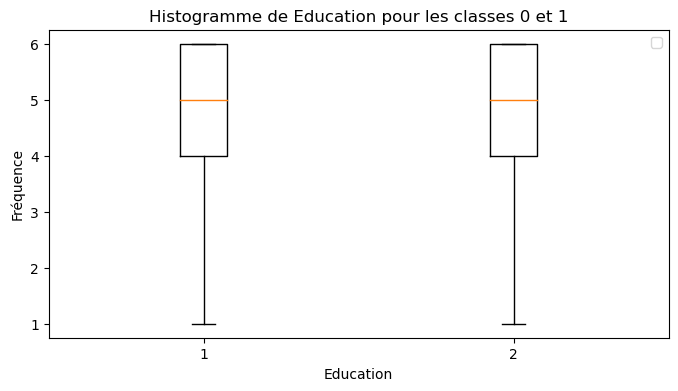

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


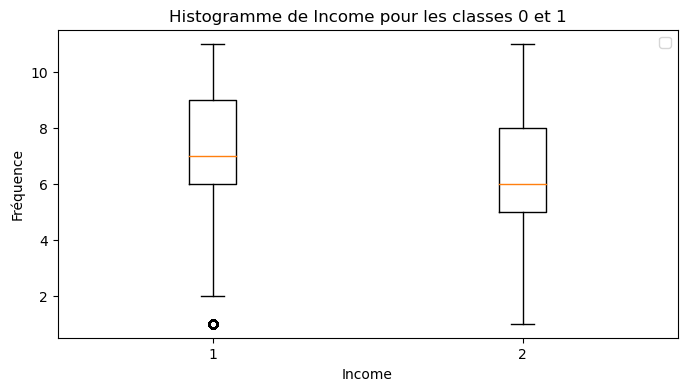

In [90]:
for col in df.columns[1:]:  # Excluez la colonne 'Target'
    plt.figure(figsize=(8, 4))
    plt.boxplot([X_0[col], X_1[col]])
    plt.title(f'Histogramme de {col} pour les classes 0 et 1')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.legend(loc='upper right')
    plt.show()

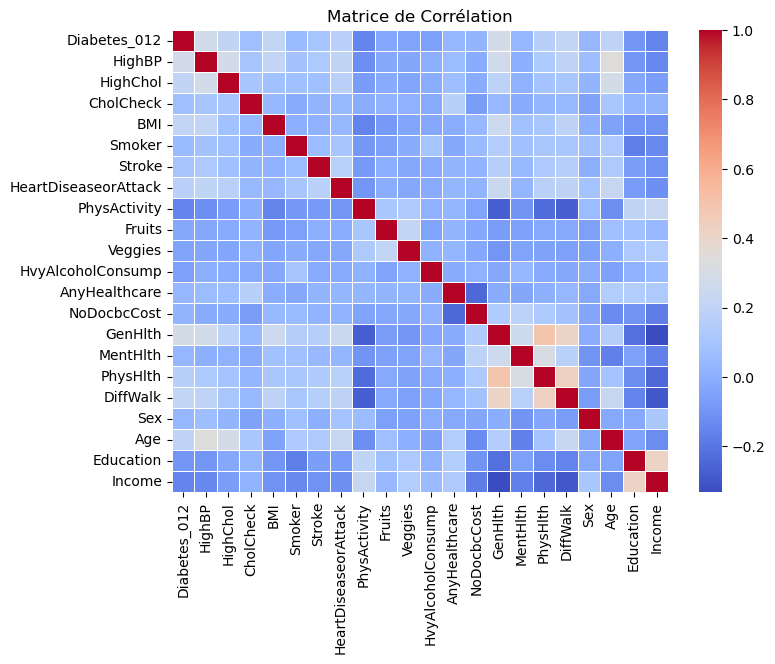

In [40]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

on remarque qu'il ya une forte correlation  entre  (PhysHlth & DiffWalk) et (GenHlth & PhysHlth )et (GenHlth & DiffWalk ) et ( Education $ Income)

In [41]:
# pour verifier si on peut supprimer les variable qui ont correlation plus que 0,8

import pandas as pd
import numpy as np

# Supposons que vous ayez déjà défini df

# Calculer la matrice de corrélation
correlation_matrix = df.corr().abs()

# Sélectionner la partie supérieure de la matrice de corrélation
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Trouver les colonnes corrélées avec un seuil
threshold = 0.8
correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Supprimer les colonnes corrélées
df_no_corr = df.drop(columns=correlated_columns)



In [44]:

scaler = StandardScaler()
# Apply standardization to the entire DataFrame
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [45]:
df = df.drop("Diabetes_012", axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_standardized, diabetes_target, stratify=diabetes_target, random_state=42)

In [94]:
# Créez des poids d'échantillonnage en fonction des classes
class_weights = {0: 1, 1: 2, 2: 1}  # Ajustez les poids selon vos besoins

# Créez un tableau de poids pour chaque exemple d'entraînement
sample_weights = [class_weights[label] for label in y_train]

In [47]:
# utilisation de cross validation 
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Utilisez la validation croisée stratifiée avec 5 plis
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Créez un modèle Gradient Boosting
gb_model = GradientBoostingClassifier()


# Définissez la grille des hyperparamètres que vous souhaitez rechercher
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    
}

# Utilisez la validation croisée stratifiée avec 5 plis
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Créez l'objet GridSearchCV en utilisant la stratégie de validation croisée stratifiée
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')

# Effectuez la recherche sur la grille avec les données d'entraînement 
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Affichez les meilleurs hyperparamètres trouvés
print("Best Hyperparameters:", grid_search.best_params_)

# Obtenez le meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Faites des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluez les performances du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy on test set: 1.0


In [71]:

cm_normalized = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_normalized)

Confusion Matrix:
[[9686    0    0]
 [   0  269    0]
 [   0    0 1672]]


In [102]:
#fonction pour évaluation de méthodes
def error_rate(modele,y_test,X_test):
    #prediction
    y_pred = modele.predict(X_test)
    #taux d'erreur
    err = 1.0 - metrics.accuracy_score(y_test,y_pred)
    #return
    return err
#fin fonction


In [101]:
# Utilisez la fonction error_rate
error_rate_value = error_rate(best_model, y_test, X_test)
print('Error rate on test set:', error_rate_value)



Error rate on test set: 0.0
